In [1]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag

platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
!pip install fastai

import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

Looking in links: https://download.pytorch.org/whl/nightly/cu92/torch_nightly.html
    100% |████████████████████████████████| 598.6MB 23kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x61fb6000 @  0x7f672e1512a4 0x594e17 0x626104 0x51190a 0x4f5277 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x510c78 0x5119bd 0x4f5277 0x4f3338 0x510fb0 0x5119bd 0x4f6070 0x4f3338 0x510fb0 0x5119bd 0x4f6070
    100% |████████████████████████████████| 122kB 3.9MB/s 
    100% |████████████████████████████████| 61kB 6.9MB/s 
torchvision-nightly 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
1.0.0.dev20181109
True
True


In [2]:
import fastai
print(fastai.__version__)
from fastai import *
from fastai.vision import *

1.0.22


In [3]:
!ls

malaria.zip  sample_data


In [4]:
!unzip malaria.zip

Archive:  malaria.zip
   creating: malaria/train/
   creating: malaria/train/malaria/
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_162.png  
  inflating: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_163.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_164.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_165.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_166.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_167.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_168.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_169.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_170.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144104_cell_171.png  
 extracting: malaria/train/malaria/C100P61ThinF_IMG_20150918_144348_cell_138.png  
 

In [5]:
!ls

malaria  malaria.zip  sample_data


In [0]:


from fastai import *
from fastai.vision import *

In [0]:
path = 'malaria'

In [0]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(),num_workers=0, size=224).normalize(imagenet_stats)

In [9]:
print('Train size:', len(data.train_ds))
print('Valid size:', len(data.valid_ds))

Train size: 23080
Valid size: 4478


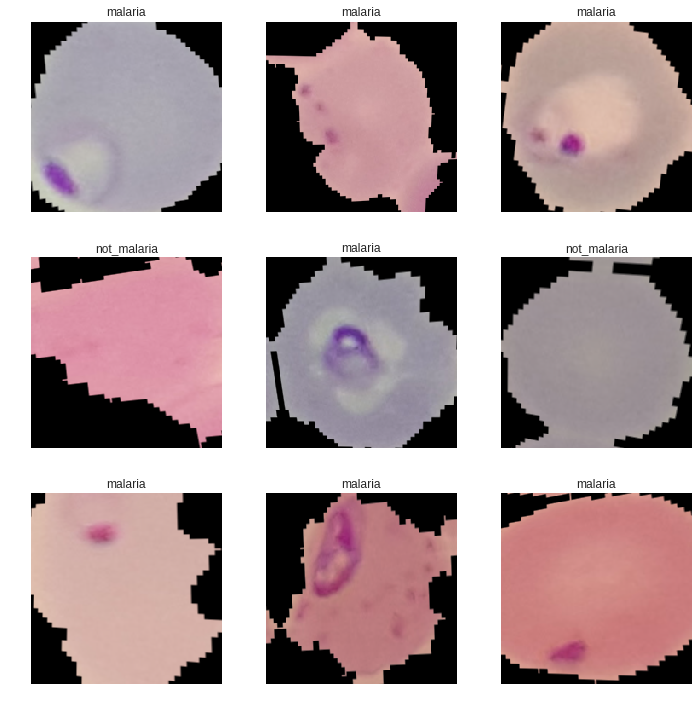

In [10]:
data.show_batch(rows=3, figsize=(10,10))

In [11]:
%%time
learn = create_cnn(data, models.resnet50, metrics=accuracy)
learn.fit(1)


Total time: 10:29
epoch  train_loss  valid_loss  accuracy
1      0.151839    0.131316    0.960473  (10:29)

CPU times: user 8min 34s, sys: 1min 51s, total: 10min 25s
Wall time: 10min 38s


In [12]:
%%timeit
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-5,3e-4), pct_start=0.05)

Total time: 36:45
epoch  train_loss  valid_loss  accuracy
1      0.085466    0.082853    0.974096  (12:16)
2      0.064153    0.119777    0.968066  (12:17)
3      0.060037    0.122226    0.970969  (12:11)

1 loop, best of 3: 36min 37s per loop


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

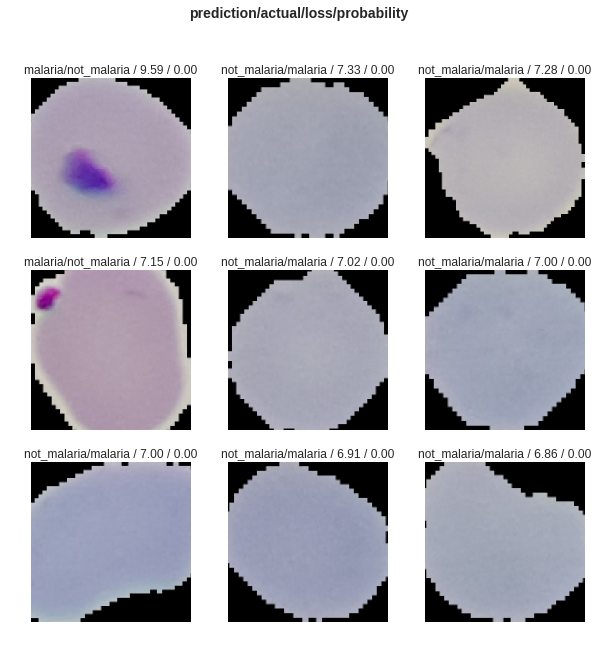

In [15]:
interp.plot_top_losses(9, figsize=(10,10))

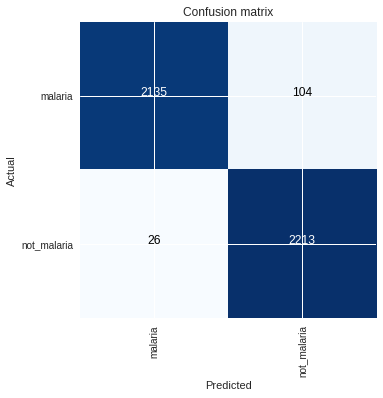

In [16]:
interp.plot_confusion_matrix()

In [0]:
learn.save('malaria__Resnet50')

Sensitivity	0.9536	

Specificity	0.9884	

Precision	0.9880	

Negative Predictive Value	0.9551	

False Positive Rate	0.0116	

False Discovery Rate	0.0120	

False Negative Rate	0.0464	

Accuracy	0.9710	

F1 Score	0.9705	

Matthews Correlation Coefficient	0.9425	

In [1]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid pni pclmulqdq ssse3 fma cx16 sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
mode

In [2]:
!cat /proc/meminfo

MemTotal:       13335212 kB
MemFree:          642900 kB
MemAvailable:   11316128 kB
Buffers:           71780 kB
Cached:          9726456 kB
SwapCached:            0 kB
Active:          2556796 kB
Inactive:        9460880 kB
Active(anon):    1436764 kB
Inactive(anon):     6480 kB
Active(file):    1120032 kB
Inactive(file):  9454400 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               276 kB
Writeback:             0 kB
AnonPages:       2213664 kB
Mapped:           569932 kB
Shmem:              6992 kB
Slab:             474036 kB
SReclaimable:     424924 kB
SUnreclaim:        49112 kB
KernelStack:        3792 kB
PageTables:        11328 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667604 kB
Committed_AS:    3972700 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  